## <center>$\color{blue}{\text{Tecnológico de Monterrey}}$</center>  <center>$\color{blue}{\text{Campus Santa Fe}}$</center>  
## <center>$\color{black}{\text{Mathematics and Data Science for Decision Making}}$</center>  <center>$\color{black}{\text{Name and Student ID:}}$</center>
## <center>$\color{blue}{\text{Descriptive Statistics: Average Annual Wages}}$</center> 

![alt text](wages.jpg "Average Annual Wages")

## $\color{blue}{\text{Introduction.}}$   
</br></br>
<div style="text-align: justify"> Descriptive statistics provide simple summaries about the observations that have been made. Such summaries may be either quantitative or visual, i.e., summary statistics or simple-to-understand graphs. These summaries may either form the basis of the initial description of the data as part of a more extensive statistical analysis, or they may be sufficient in and of themselves for a particular investigation.Initially, when we get the data, instead of applying fancy algorithms and making some predictions, we first try to read and understand the data by applying statistical techniques.</div> 

</br></br>

<div style="text-align: justify">We will root our discussion of statistics in real-world data taken from OECD.Stat homepage (https://stats.oecd.org/). In this notebook we describe an OECD (Organization for Economic Co-operation and Development) dataset containing data on average annual wages for full-time and full-year equivalent employees in the total economy. Average annual wages per full-time equivalent dependent employee are obtained by dividing the national-accounts-based total wage bill by the average number of employees in the total economy, which is then multiplied by the ratio of average usual weekly hours per full-time employee to average usually weekly hours for all employees. For more details, see:  

</br></br>

- <http://www.oecd.org/els/oecd-employment-outlook-19991266.htm>


- <http://www.oecd.org/employment/emp/onlineoecdemploymentdatabase.htm>


- <http://www.oecd.org/els/emp/AVERAGE_WAGES.pdf> </div>

## $\color{blue}{\text{Python Imports and Setup}}$

</br></br>

First we import the required libraries into the Jupyter Notebook.


* In the cell below, we import the following packages (summarized here in no particular order):
    * **NumPy** (<http://www.numpy.org/>)
        * A fundamental package for generic N-dimensional array representation and manipulation.
        * Also provides many methods that quickly and easily handle linear algebra, Fourier transforms, and random number generation capabilities.
        * Part of the SciPy ecosystem of open-source mathematic and scientific Python packages.<br/><br/>
    * **pandas** (<https://pandas.pydata.org/>)
        * Links up nicely with NumPy by defining, and being based entirely around, two powerful data structures: the Series, and the DataFrame. The former is like a column of data $\dots$ while the latter is like a table of data.
        * Therein provides very, very!! useful tools for loading, working, and manipulating data.
        * Also part of the SciPy ecosystem of packages.<br/><br/>
    * **SciPy** (<https://scipy.org/> and in particular <https://docs.scipy.org/doc/scipy/reference/stats.html>)
        * We load the `stats` library of the SciPy package in order to access the significant range of statistical functions, tests, and transformations $\dots$ as well as probability distributions $\dots$ that it provides.<br/><br/>
    * **matplotlib** (<https://matplotlib.org/>)
        * The official Python 2D and 3D plotting library for generating plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., etc.
        * Also part of the SciPy ecosystem of packages.<br/><br/>
    * **seaborn** (<http://seaborn.pydata.org/>)
        * Built on top of matplotlib (and seamlessly falling back to matplotlib API when in doubt) - seaborn is a more modern data visualization library than matplotlib.
        * In particular it provides a high level interface (again, on top of matplotlib) for drawing attractive and informative statistical graphics.


* Note: later on we will be importing more Python packages and tools.

In [1]:
# This command (%matplotlib inline) simply ensures that any plot we produce in this notebook is immediately displayed on screen, 
# directly below the code that created it.
%matplotlib inline

try:
    import scipy.stats as stats
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except ModuleNotFoundError as err:
    print("Python says:", err, "... possibly because it isn't installed on your system?")
except:
    print("Some other error occurred when importing.")
else:
    print("Imports successful!")
    sns.set()

Imports successful!


## $\color{blue}{\text{Download, Open and Read the Data}}$
* Head to the OECD.Stat homepage, at <https://stats.oecd.org>, and under Labour>Earnings, download the dataset we'll be using for this activity. It is the Average annual wages CSV file, rename it as `wage` and save it in the same folder of this notebook.


* Read the file in using panda's `read_csv` method (<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>). Name the file `wage`.

In [2]:
# Read the data in, from a CSV file, and store the data in a DataFrame.
# The DataFrame created will take on the column names as they are provided in the file.
wage = pd.read_csv('wage.csv')

* Double-check the type of the object `wage` $\dots$ **_Hint_**: it should be a pandas DataFrame!
* And if you wish, head to <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html> to learn more about the DataFrame structure.

In [3]:
type(wage)

pandas.core.frame.DataFrame

* Check the shape of the DataFrame; how many rows and columns are there?

In [4]:
# The shape of the DataFrame
wage.shape

(2520, 15)

## $\color{blue}{\text{Data Exploration}}$


* Since the file is small enough (338 KB), we can print its contents.

* $\color{red}{\text{Note:}}$
    * Large files will either crash the Notebook, or take too long to process, or take up a rididculous amount of space in your Notebook (which you don't want to have to take forever to scroll through); besides, getting a grasp of what your data looks like is part of the challenge of data exploration!
    
    * We are lucky that the dataset is already structured into rows and columns $\dots$ much like a Microsoft Excel spreadsheet.

* However, it is still **invaluable to thoroughly explore the dataset** to be totally satisfied that what OECD (or wherever else you happen to get data from) claims about the dataset is actually true. For example, how can we be completely confident there are no null values `n/a` or `nan` to deal with? 

In [5]:
# Print contents                                                
wage

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,CPNCU,Current prices in NCU,2000,2000,AUD,Australian Dollar,0,Units,NaN,NaN,47222.715450,NaN,NaN
1,AUS,Australia,CPNCU,Current prices in NCU,2001,2001,AUD,Australian Dollar,0,Units,NaN,NaN,48366.628497,NaN,NaN
2,AUS,Australia,CPNCU,Current prices in NCU,2002,2002,AUD,Australian Dollar,0,Units,NaN,NaN,50109.137562,NaN,NaN
3,AUS,Australia,CPNCU,Current prices in NCU,2003,2003,AUD,Australian Dollar,0,Units,NaN,NaN,51867.999938,NaN,NaN
4,AUS,Australia,CPNCU,Current prices in NCU,2004,2004,AUD,Australian Dollar,0,Units,NaN,NaN,54283.669777,NaN,NaN
5,AUS,Australia,CPNCU,Current prices in NCU,2005,2005,AUD,Australian Dollar,0,Units,NaN,NaN,56174.404861,NaN,NaN
6,AUS,Australia,CPNCU,Current prices in NCU,2006,2006,AUD,Australian Dollar,0,Units,NaN,NaN,58577.029175,NaN,NaN
7,AUS,Australia,CPNCU,Current prices in NCU,2007,2007,AUD,Australian Dollar,0,Units,NaN,NaN,62067.955573,NaN,NaN
8,AUS,Australia,CPNCU,Current prices in NCU,2008,2008,AUD,Australian Dollar,0,Units,NaN,NaN,64554.535193,NaN,NaN
9,AUS,Australia,CPNCU,Current prices in NCU,2009,2009,AUD,Australian Dollar,0,Units,NaN,NaN,65621.764713,NaN,NaN


In [6]:
# To get a grasp of your data, print the first 5 rows (5 is the default)
wage.head()

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,CPNCU,Current prices in NCU,2000,2000,AUD,Australian Dollar,0,Units,NaN,NaN,47222.715450,NaN,NaN
1,AUS,Australia,CPNCU,Current prices in NCU,2001,2001,AUD,Australian Dollar,0,Units,NaN,NaN,48366.628497,NaN,NaN
2,AUS,Australia,CPNCU,Current prices in NCU,2002,2002,AUD,Australian Dollar,0,Units,NaN,NaN,50109.137562,NaN,NaN
3,AUS,Australia,CPNCU,Current prices in NCU,2003,2003,AUD,Australian Dollar,0,Units,NaN,NaN,51867.999938,NaN,NaN
4,AUS,Australia,CPNCU,Current prices in NCU,2004,2004,AUD,Australian Dollar,0,Units,NaN,NaN,54283.669777,NaN,NaN


In [7]:
# Now print the last 5 rows
wage.tail()

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2515,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2013,2013,USD,US Dollar,0,Units,2016.0,2016.0,11455.619508,NaN,NaN
2516,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2014,2014,USD,US Dollar,0,Units,2016.0,2016.0,11914.206230,NaN,NaN
2517,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2015,2015,USD,US Dollar,0,Units,2016.0,2016.0,12512.362452,NaN,NaN
2518,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2016,2016,USD,US Dollar,0,Units,2016.0,2016.0,13181.695594,NaN,NaN
2519,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2017,2017,USD,US Dollar,0,Units,2016.0,2016.0,14189.196450,NaN,NaN


In [8]:
# Or print the first 10 rows
wage.head(10)

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,CPNCU,Current prices in NCU,2000,2000,AUD,Australian Dollar,0,Units,NaN,NaN,47222.715450,NaN,NaN
1,AUS,Australia,CPNCU,Current prices in NCU,2001,2001,AUD,Australian Dollar,0,Units,NaN,NaN,48366.628497,NaN,NaN
2,AUS,Australia,CPNCU,Current prices in NCU,2002,2002,AUD,Australian Dollar,0,Units,NaN,NaN,50109.137562,NaN,NaN
3,AUS,Australia,CPNCU,Current prices in NCU,2003,2003,AUD,Australian Dollar,0,Units,NaN,NaN,51867.999938,NaN,NaN
4,AUS,Australia,CPNCU,Current prices in NCU,2004,2004,AUD,Australian Dollar,0,Units,NaN,NaN,54283.669777,NaN,NaN
5,AUS,Australia,CPNCU,Current prices in NCU,2005,2005,AUD,Australian Dollar,0,Units,NaN,NaN,56174.404861,NaN,NaN
6,AUS,Australia,CPNCU,Current prices in NCU,2006,2006,AUD,Australian Dollar,0,Units,NaN,NaN,58577.029175,NaN,NaN
7,AUS,Australia,CPNCU,Current prices in NCU,2007,2007,AUD,Australian Dollar,0,Units,NaN,NaN,62067.955573,NaN,NaN
8,AUS,Australia,CPNCU,Current prices in NCU,2008,2008,AUD,Australian Dollar,0,Units,NaN,NaN,64554.535193,NaN,NaN
9,AUS,Australia,CPNCU,Current prices in NCU,2009,2009,AUD,Australian Dollar,0,Units,NaN,NaN,65621.764713,NaN,NaN


In [9]:
# Or the last 20 rows
wage.tail(20)

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2500,LTU,Lithuania,USDPPP,In 2017 constant prices at 2017 USD PPPs,2016,2016,USD,US Dollar,0,Units,2016.0,2016.0,22562.385292,NaN,NaN
2501,LTU,Lithuania,USDPPP,In 2017 constant prices at 2017 USD PPPs,2017,2017,USD,US Dollar,0,Units,2016.0,2016.0,24286.869243,NaN,NaN
2502,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2000,2000,USD,US Dollar,0,Units,2016.0,2016.0,5576.006699,NaN,NaN
2503,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2001,2001,USD,US Dollar,0,Units,2016.0,2016.0,5895.331499,NaN,NaN
2504,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2002,2002,USD,US Dollar,0,Units,2016.0,2016.0,6153.414757,NaN,NaN
2505,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2003,2003,USD,US Dollar,0,Units,2016.0,2016.0,6562.257351,NaN,NaN
2506,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2004,2004,USD,US Dollar,0,Units,2016.0,2016.0,7102.612860,NaN,NaN
2507,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2005,2005,USD,US Dollar,0,Units,2016.0,2016.0,7869.101211,NaN,NaN
2508,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2006,2006,USD,US Dollar,0,Units,2016.0,2016.0,9223.898465,NaN,NaN
2509,LTU,Lithuania,USDEX,In 2017 constant prices at 2017 USD exchange r...,2007,2007,USD,US Dollar,0,Units,2016.0,2016.0,10167.689623,NaN,NaN


* As you can see, there are null values `nan` in the dataset.


* Check for null values in the data set, per column and on a specific column.


* Fill null values with an empty space `" "` and store your new DataFrame with the same name: `wage`.

In [10]:
# Null values in the DataFrame
wage.isnull()

,COUNTRY,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
5,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
6,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
7,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
8,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True
9,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True


In [11]:
# Null values per column
wage.isnull().sum()

COUNTRY                     0
Country                     0
SERIES                      0
Series                      0
TIME                        0
Time                        0
Unit Code                   0
Unit                        0
PowerCode Code              0
PowerCode                   0
Reference Period Code     630
Reference Period          630
Value                       0
Flag Codes               2520
Flags                    2520
dtype: int64

In [12]:
# Or null values in a specific column
wage['Reference Period'].isnull().sum()

630

In [13]:
# Fill null values with an empty space and store the new DataFrame under the same name: "wagena"
wagena = wage.fillna(" ")

## $\color{blue}{\text{Task: Check for null values in the new DataFrame, you shoud have none!}}$ 

In [14]:
# Type your code: 
wagena.isnull().sum()


COUNTRY                  0
Country                  0
SERIES                   0
Series                   0
TIME                     0
Time                     0
Unit Code                0
Unit                     0
PowerCode Code           0
PowerCode                0
Reference Period Code    0
Reference Period         0
Value                    0
Flag Codes               0
Flags                    0
dtype: int64

* Properly rename your columns if needed

In [15]:
# Rename Columns
wagena.rename(columns={'COUNTRY': 'Country Code', 'SERIES': 'Series Code', 'Time': 'Year', 'Value': 'Average Annual Wages'}, inplace=True)

## $\color{blue}{\text{Task: Print your new DataFrame}}$

* Hint: The name didn't change

In [16]:
# Print the contents of the new object:
wagena


,Country Code,Country,Series Code,Series,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Average Annual Wages,Flag Codes,Flags
0,AUS,Australia,CPNCU,Current prices in NCU,2000,2000,AUD,Australian Dollar,0,Units,,,47222.715450,,
1,AUS,Australia,CPNCU,Current prices in NCU,2001,2001,AUD,Australian Dollar,0,Units,,,48366.628497,,
2,AUS,Australia,CPNCU,Current prices in NCU,2002,2002,AUD,Australian Dollar,0,Units,,,50109.137562,,
3,AUS,Australia,CPNCU,Current prices in NCU,2003,2003,AUD,Australian Dollar,0,Units,,,51867.999938,,
4,AUS,Australia,CPNCU,Current prices in NCU,2004,2004,AUD,Australian Dollar,0,Units,,,54283.669777,,
5,AUS,Australia,CPNCU,Current prices in NCU,2005,2005,AUD,Australian Dollar,0,Units,,,56174.404861,,
6,AUS,Australia,CPNCU,Current prices in NCU,2006,2006,AUD,Australian Dollar,0,Units,,,58577.029175,,
7,AUS,Australia,CPNCU,Current prices in NCU,2007,2007,AUD,Australian Dollar,0,Units,,,62067.955573,,
8,AUS,Australia,CPNCU,Current prices in NCU,2008,2008,AUD,Australian Dollar,0,Units,,,64554.535193,,
9,AUS,Australia,CPNCU,Current prices in NCU,2009,2009,AUD,Australian Dollar,0,Units,,,65621.764713,,


* It seems that the columns `TIME` and `Year` have the same values. Let's check if this is true

In [17]:
wagena['TIME'].equals(wagena['Year'])

True

* Since we have repeated columns and empty columns, let's drop these out

In [18]:
wageoff = wagena.drop(['TIME', 'Flag Codes', 'Flags'], axis=1)
wageoff

,Country Code,Country,Series Code,Series,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Average Annual Wages
0,AUS,Australia,CPNCU,Current prices in NCU,2000,AUD,Australian Dollar,0,Units,,,47222.715450
1,AUS,Australia,CPNCU,Current prices in NCU,2001,AUD,Australian Dollar,0,Units,,,48366.628497
2,AUS,Australia,CPNCU,Current prices in NCU,2002,AUD,Australian Dollar,0,Units,,,50109.137562
3,AUS,Australia,CPNCU,Current prices in NCU,2003,AUD,Australian Dollar,0,Units,,,51867.999938
4,AUS,Australia,CPNCU,Current prices in NCU,2004,AUD,Australian Dollar,0,Units,,,54283.669777
5,AUS,Australia,CPNCU,Current prices in NCU,2005,AUD,Australian Dollar,0,Units,,,56174.404861
6,AUS,Australia,CPNCU,Current prices in NCU,2006,AUD,Australian Dollar,0,Units,,,58577.029175
7,AUS,Australia,CPNCU,Current prices in NCU,2007,AUD,Australian Dollar,0,Units,,,62067.955573
8,AUS,Australia,CPNCU,Current prices in NCU,2008,AUD,Australian Dollar,0,Units,,,64554.535193
9,AUS,Australia,CPNCU,Current prices in NCU,2009,AUD,Australian Dollar,0,Units,,,65621.764713


* How many countries do we have in this dataset?

In [19]:
# Count the unique values in a cloumn
wageoff.Country.nunique()

35

* What are these countries? 

In [20]:
# List the names if the unique values in a column
wageoff.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States',
       'Israel', 'Slovenia', 'Estonia', 'Mexico', 'Iceland',
       'New Zealand', 'Chile', 'Latvia', 'Lithuania'], dtype=object)

## $\color{blue}{\text{Task: How many years are there in this dataset?}}$ 

In [21]:
# Type your code here:
wageoff.Year.nunique()

18

## $\color{blue}{\text{Task: List the unique Years}}$ 

In [22]:
# Type your code here:
wageoff.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

## $\color{blue}{\text{Task: How many Series are there in this dataset?}}$ 

In [23]:
# Type your code here:
wageoff.Series.nunique()

4

## $\color{blue}{\text{Task: List the unique Series}}$ 

In [24]:
# Type your code here:
wageoff.Series.unique()

array(['Current prices in NCU', '2017 constant prices and NCU',
       'In 2017 constant prices at 2017 USD PPPs',
       'In 2017 constant prices at 2017 USD exchange rates'], dtype=object)

* We can also extract specific columns, say: `Country`, `Series`, `Year`, `Unit` and `Average Annual Wages`

* Rename the new object as `wagec`

In [25]:
# Extract specific columns
wagec = pd.DataFrame(wageoff)
cols = [1,3,4,6,11]
wagec = wagec[wagec.columns[cols]]
wagec

,Country,Series,Year,Unit,Average Annual Wages
0,Australia,Current prices in NCU,2000,Australian Dollar,47222.715450
1,Australia,Current prices in NCU,2001,Australian Dollar,48366.628497
2,Australia,Current prices in NCU,2002,Australian Dollar,50109.137562
3,Australia,Current prices in NCU,2003,Australian Dollar,51867.999938
4,Australia,Current prices in NCU,2004,Australian Dollar,54283.669777
5,Australia,Current prices in NCU,2005,Australian Dollar,56174.404861
6,Australia,Current prices in NCU,2006,Australian Dollar,58577.029175
7,Australia,Current prices in NCU,2007,Australian Dollar,62067.955573
8,Australia,Current prices in NCU,2008,Australian Dollar,64554.535193
9,Australia,Current prices in NCU,2009,Australian Dollar,65621.764713


* We can also create an alphanumeric index based on a column. To ilustrate this let's use the `Year` column and name the new object as `wagey` 

In [26]:
# Alphanumeric index based on a column
wagey = wagec.set_index('Year')
wagey

,Country,Series,Unit,Average Annual Wages
Year,,,,
2000,Australia,Current prices in NCU,Australian Dollar,47222.715450
2001,Australia,Current prices in NCU,Australian Dollar,48366.628497
2002,Australia,Current prices in NCU,Australian Dollar,50109.137562
2003,Australia,Current prices in NCU,Australian Dollar,51867.999938
2004,Australia,Current prices in NCU,Australian Dollar,54283.669777
2005,Australia,Current prices in NCU,Australian Dollar,56174.404861
2006,Australia,Current prices in NCU,Australian Dollar,58577.029175
2007,Australia,Current prices in NCU,Australian Dollar,62067.955573
2008,Australia,Current prices in NCU,Australian Dollar,64554.535193


* We can also extract specific rows, say all having `In 2017 constant prices at 2017 USD exchange rates` as `Series` and `2017` as `Year`. Name the new object as `wage17` 

* Afterwards, let's order the Dataframe and name it `wage17_ordered`

In [27]:
# Extract specific rows
array17 = ['In 2017 constant prices at 2017 USD exchange rates']
wage17 = wagec.loc[(wagec['Year'] == 2017) & wagec['Series'].isin(array17)]
wage17_ordered = wage17.sort_values('Average Annual Wages', ascending=True)
wage17_ordered

,Country,Series,Year,Unit,Average Annual Wages
2087,Mexico,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,8592.534240
1709,Hungary,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,12506.458791
1853,Poland,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,13430.581809
2519,Lithuania,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,14189.196450
1889,Slovak Republic,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,14880.524174
1601,Czech Republic,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,15373.778111
2447,Latvia,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,15411.913914
2033,Estonia,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,17039.369624
2375,Chile,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,18645.056281
1871,Portugal,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,19209.985422


## $\color{blue}{\text{Task: What is the shape of "wage17_ordered"?}}$

In [37]:
# Type your code here:
wage17_ordered.shape

(35, 5)

* After many modificactions, we might want to save our new DataFrame as a CSV file.

In [39]:
# Export a DataFrame to CSV
wage17_ordered.to_csv('wage17.csv')

# $\color{blue}{\text{Descriptive Statistics}}$

* We can use the method `describe` to obtain a nummerical summary of the dataset 

In [30]:
# Nummerical summary
wage17_ordered.describe()

,Year,Average Annual Wages
count,35.0,35.000000
mean,2017.0,40099.286033
std,0.0,21743.599359
min,2017.0,8592.534240
25%,2017.0,18927.520851
50%,2017.0,42409.789755
75%,2017.0,51369.057799
max,2017.0,90661.520643


* We can get the summary for a specific column

In [31]:
# Nummerical summary of a specific column
wage17_ordered['Average Annual Wages'].describe()

count       35.000000
mean     40099.286033
std      21743.599359
min       8592.534240
25%      18927.520851
50%      42409.789755
75%      51369.057799
max      90661.520643
Name: Average Annual Wages, dtype: float64

## $\color{blue}{\text{Description.}}$

* This is a summary of the Average Annual Wages of the 35 OECD countries in the year 2017, given in US Dollars (with constant prices at 2017 USD exchange rates). The mean annual wage is of about `US$40,100.00` with a standard deviation of `US$21,744.00`. The minimum is of about `US$8,593.00` and the maximum of `US$90,662.00`. From these countries; 25% have an average annual wage between `US$8,593.00`and `US$18,928.00`, 25% have an average annual wage between `US$51,370.00`and `US$90,662.00` and the middle half of the countries; that is, the middle 50% have an average annual wage between `US$18,928.00`and `US$51,370.00`.   

* For a visual descriptin, we can plot a histogram for `Average Annual Wages`

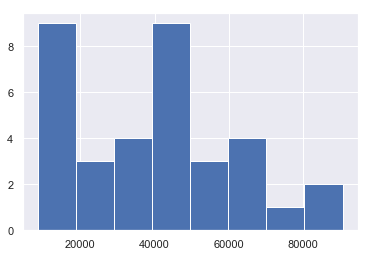

In [32]:
# Histogram
wage17_ordered['Average Annual Wages'].hist(bins=8)

## $\color{blue}{\text{Description.}}$

* From the histogram we can see that about 9 countries have average annual wages less than `US$20,000.00` and about 2 countries above `US$80,000.00`. Also, 9 countries have average annual wages between `US$40,000.00` and `US$50,000.00`  

* We can draw a horizontal boxplot for `Average Annual Wages`using seaborn

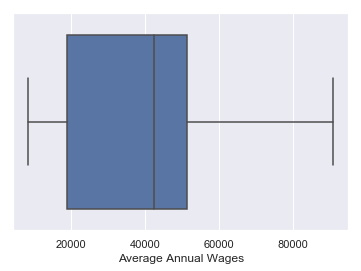

In [33]:
# Boxplot
sns.boxplot(x=wage17_ordered['Average Annual Wages'])

* Or a vertical one 

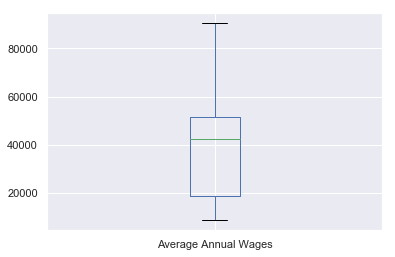

In [34]:
# Boxplot
wage17_ordered.boxplot(column='Average Annual Wages', sym='o', return_type='axes')

## $\color{blue}{\text{Description.}}$

From this boxplots we can see that there are no outliers 

* We can also add a new column to the DataFrame. Let's add the individual deviations

In [35]:
# Ad a new column
wage17_ordered['Individual stdev'] = ((wage17_ordered['Average Annual Wages'] - wage17_ordered['Average Annual Wages'].mean()).apply(abs) / wage17_ordered['Average Annual Wages'].std())
wage17_ordered.sort_values(by='Average Annual Wages', ascending=True)

,Country,Series,Year,Unit,Average Annual Wages,Individual stdev
2087,Mexico,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,8592.534240,1.449013
1709,Hungary,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,12506.458791,1.269009
1853,Poland,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,13430.581809,1.226508
2519,Lithuania,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,14189.196450,1.191619
1889,Slovak Republic,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,14880.524174,1.159825
1601,Czech Republic,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,15373.778111,1.137140
2447,Latvia,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,15411.913914,1.135386
2033,Estonia,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,17039.369624,1.060538
2375,Chile,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,18645.056281,0.986692
1871,Portugal,In 2017 constant prices at 2017 USD exchange r...,2017,US Dollar,19209.985422,0.960710


## $\color{blue}{\text{Task: Describe numericaly and graphically the mexican case from 2000 to 2017 in Current prices in NCU
(National Currency Unit) and export your new DataFrame to CSV, name it `wagemex`}}$ 

In [36]:
# All your code below